**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)


Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)


Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)

Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных.

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

# Задание 1.

Загрузите данные из CSV-файла и выведите первые 5 строк, чтобы ознакомиться с содержимым таблицы.
Проверьте информацию о данных с помощью метода info(), чтобы понять, какие типы данных представлены, есть ли пропущенные значения.
Посчитайте количество пропущенных значений в каждом столбце.

In [1]:
import os

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/train.csv', sep=';',
                 index_col='id')

In [3]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Считываем данные из CSV-файла в объект pandas DataFrame.  

Посмотрим на первые 5 записей.

In [6]:
print(df.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [7]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Задание 2.

Определите, сколько мужчин и женщин представлено в этом наборе данных.  Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке gender).  Это возможно понять исходя из роста пациента, т. к.  в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин

In [8]:
# Ваш код здесь
a = df[df.gender==1]['gender'].count()
b = df[df.gender==2]['gender'].count()
if df[df.gender==1]['height'].mean() < df[df.gender==2]['height'].mean():
    print(a,'женщин', b,'мужчин')
else:
    print(b,'женщин', a,'мужчин')

45530 женщин 24470 мужчин


In [9]:

print(df.groupby(['gender']) ['height'].mean())

gender
1    161.355612
2    169.947895
Name: height, dtype: float64


In [10]:
pd.pivot_table(df,index=["gender"],values=["height"], aggfunc=[np.mean])

/tmp/ipython-input-10-1289838515.py:1: FutureWarning: The provided callable <function mean at 0x7ae313bda340> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df,index=["gender"],values=["height"], aggfunc=[np.mean])


,mean
,height
gender,
1,161.355612
2,169.947895


In [11]:
g1=df.gender.value_counts()
g=df.pivot = pd.pivot_table(
data=df,
index='gender',
values='height',
aggfunc='mean')

In [12]:
print("{0} {1} и {2} {3}".format(
    df[df['gender'] == 1]['height'].count(),
    "женщин" if df[df['gender'] == 1]['height'].mean() < df[df['gender'] == 2]['height'].mean() else "мужчин",
    df[df['gender'] == 2]['height'].count(),
    "женщин" if df[df['gender'] == 1]['height'].mean() > df[df['gender'] == 2]['height'].mean() else "мужчин"
))

45530 женщин и 24470 мужчин


In [13]:
df[['gender','height','weight']].groupby('gender').mean()

,height,weight
gender,,
1,161.355612,72.565605
2,169.947895,77.257307


#Вопрос 3.
Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.


- Переименуйте столбцы, чтобы привести их к более удобному и читаемому виду (например, age вместо age_days).
- Преобразуйте возраст из дней в годы, создав новый столбец age_years.
- Преобразуйте значения категориальных признаков (например, gender) в текстовые значения (например, 1 -> "Female", 2 -> "Male").
-Убедитесь, что нет дубликатов строк. Если дубликаты есть, удалите их.

In [14]:
# Преобразование возраста в годы
df['age_years'] = (df['age'] / 365).astype(int)

# Проверка новых данных
print(df[['age', 'age_years']].head())

      age  age_years
id                  
0   18393         50
1   20228         55
2   18857         51
3   17623         48
4   17474         47


In [15]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52


In [16]:
df['gender_m'] = df['gender'].map({1: 'Female', 2: 'Male'})

# Проверка результата
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Male
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Female
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Female
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Male
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Male
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Female
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Male


In [17]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f'Number of duplicates: {duplicates}')

# Удаление дубликатов
df = df.drop_duplicates()

Number of duplicates: 24


# Задание 4.

Определите, кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?





**<font color='red'>Варианты:</font>**
- мужчины
- женщины

In [18]:
# Ваш код здесь
print("женщины" if df[df['gender'] == 1]['alco'].mean() < df[df['gender'] == 2]['alco'].mean() else "мужчины")

женщины


In [19]:
pd.crosstab(df['gender_m'], df['alco'])

alco,0,1
gender_m,,
Female,44348,1161
Male,21864,2603


In [20]:
pd.crosstab(df['gender_m'], df['alco'], normalize = True)

alco,0,1
gender_m,,
Female,0.63376,0.016591
Male,0.31245,0.037198


In [21]:
pd.pivot_table(df,
index=["gender"],
values=["alco"],
aggfunc=[np.mean])

/tmp/ipython-input-21-58148399.py:1: FutureWarning: The provided callable <function mean at 0x7ae313bda340> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df,


,mean
,alco
gender,
1,0.025511
2,0.106388


In [22]:
pd.crosstab(df.gender, df.alco)

alco,0,1
gender,,
1,44348,1161
2,21864,2603


In [23]:
df.groupby('gender')['alco'].mean()

,alco
gender,
1,0.025511
2,0.106388


#Задание 5.

Определите, во сколько раз (округленно, round) процент курящих среди мужчин больше, чем процент курящих среди женщин (согласно этим анкетным данным)?

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

In [24]:
# Ваш код здесь
s=df.groupby('gender').smoke.mean()
if s[2] > s[1]:
    print(round(s[2]/s[1]))
else:
    print(round(s[1]/s[2]))

12


In [25]:
round((df[df['gender'] == 2]['smoke'].mean() * 100) / (df[df['gender'] == 1]['smoke'].mean() * 100))

12

In [26]:
alco_percent = df.groupby(['gender']).sum()['smoke'] / df.groupby(['gender']).count()['smoke']
round(alco_percent[2] / alco_percent[1])

12

In [27]:
round(df[df['gender'] ==2]['smoke'].mean()/df[df['gender']==1]['smoke'].mean())

12

In [28]:
smoke = pd.crosstab(df['gender'] , df['smoke'], normalize = "index")
smoke= round(smoke * 100)
smoke

smoke,0,1
gender,,
1,98.0,2.0
2,78.0,22.0


In [29]:
print(df.groupby('gender').smoke.mean())
N=round(df[df['gender'] == 2]['smoke'].mean()/df[df['gender'] == 1]['smoke'].mean(),)
print( N)

gender
1    0.017865
2    0.218907
Name: smoke, dtype: float64
12


In [30]:
pd.DataFrame(round(100*(df.groupby('gender')['smoke'].mean())))

,smoke
gender,
1,2.0
2,22.0


#Задание 6.

- Используйте метод describe(), чтобы получить статистические характеристики числовых признаков (например, минимальные, максимальные значения, среднее, стандартное отклонение).
- Выведите количество пациентов с сердечно-сосудистыми заболеваниями и без них (cardio = 1 и cardio = 0).
- Создайте сводную таблицу, показывающую средний возраст пациентов для каждой комбинации категориальных признаков (gender, smoke, alco, и т.д.).

**<font color='red'>Варианты:</font>**
- 10
- 15
- 20
- 25

In [31]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Male
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Female
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Female
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Male
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Male
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Female
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Male


In [32]:
20540/365

56.273972602739725

In [33]:
# Ваш код здесь

round((df[df['smoke'] == 0]['age'].median() - df[df['smoke'] == 1]['age'].median()) / 365.25 * 12)


20

In [34]:
df_smoke = df[(df['smoke'] == 1)]['age'].median()
df_not_smoke = df[(df['smoke'] == 0)]['age'].median()

print('Медианный возраст курящих:', df_smoke / 30, 'месяцев')
print('Медианный возраст некурящих:', df_not_smoke / 30, 'месяцев')
print('Медианные значения возраста курящих от некурящих, отличаются на:', round((df_not_smoke / 30) - (df_smoke / 30), 0), 'месяцев')

Медианный возраст курящих: 637.5 месяцев
Медианный возраст некурящих: 657.4333333333333 месяцев
Медианные значения возраста курящих от некурящих, отличаются на: 20.0 месяцев


In [35]:
e = df.groupby('smoke')['age'].median()
e

,age
smoke,
0,19723.0
1,19125.0


In [36]:
e = df.groupby('smoke')['age'].median()
e1 =round((e[0]-e[1])/30)
print(e1)

20


In [37]:
not_smoke = df.query('smoke < 1')
median_not_smoke = not_smoke['age'].median()/12

is_smoke = df.query('smoke > 0')
median_is_smoke = is_smoke['age'].median()/12

median_not_smoke - median_is_smoke

49.83333333333326

Задание 6.


Используйте метод describe(), чтобы получить статистические характеристики числовых признаков (например, минимальные, максимальные значения, среднее, стандартное отклонение).
Выведите количество пациентов с сердечно-сосудистыми заболеваниями и без них (cardio = 1 и cardio = 0).
Создайте сводную таблицу, показывающую средний возраст пациентов для каждой комбинации категориальных признаков (gender, smoke, alco, и т.д.).

In [38]:
cardio_counts = df['cardio'].value_counts()

print(cardio_counts)

cardio
0    35004
1    34972
Name: count, dtype: int64


In [39]:
pivot_table = pd.pivot_table(
    df,
    values='age_years',                 # Столбец для вычисления среднего
    index=['gender', 'smoke', 'alco'],  # Категориальные признаки
    aggfunc='mean'                      # Функция для агрегации (в данном случае - среднее)
)

print(pivot_table)

                   age_years
gender smoke alco           
1      0     0     52.989038
             1     52.517483
       1     0     51.978560
             1     50.187500
2      0     0     52.858532
             1     52.761276
       1     0     52.007373
             1     51.448052


In [40]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df

/tmp/ipython-input-40-2674840192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['weight'] / (df['height'] / 100) ** 2


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m,BMI
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Male,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Female,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Female,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Male,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Female,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Male,26.927438
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Female,50.472681
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Male,31.353579


**<font color='red'>Утверждения:</font>**
- **<font color='green'>Медианный BMI по выборке превышает норму</font>**
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- **<font color='green'>В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин</font>**

In [41]:

# Пример функции классификации уровня холестерина
def classify_cholesterol(level):
    if level == 1:
        return 'низкий'
    elif level == 2:
        return 'средний'
    elif level == 3:
        return 'высокий'
    else:
        return 'неизвестно'

# Применение функции к столбцу cholesterol
df['cholesterol_level'] = df['cholesterol'].apply(classify_cholesterol)

# Проверка результата
print(df[['cholesterol', 'cholesterol_level']].head())


    cholesterol cholesterol_level
id                               
0             1            низкий
1             3           высокий
2             3           высокий
3             1            низкий
4             1            низкий


/tmp/ipython-input-41-2018025803.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholesterol_level'] = df['cholesterol'].apply(classify_cholesterol)


In [42]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m,BMI,cholesterol_level
id,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Male,21.967120,низкий
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Female,34.927679,высокий
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Female,23.507805,высокий
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Male,28.710479,низкий
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Female,23.011177,низкий
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Male,26.927438,низкий
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Female,50.472681,средний
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Male,31.353579,высокий


In [43]:
# Пример функции расчета ИМТ
def calculate_bmi(row):
    height_m = row['height'] / 100  # преобразование роста в метры
    weight_kg = row['weight']
    return weight_kg / (height_m ** 2)

# Применение функции к данным для расчета ИМТ
df['BMI_new'] = df.apply(calculate_bmi, axis=1)
df

/tmp/ipython-input-43-3256081034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_new'] = df.apply(calculate_bmi, axis=1)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m,BMI,cholesterol_level,BMI_new
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Male,21.967120,низкий,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Female,34.927679,высокий,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Female,23.507805,высокий,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Male,28.710479,низкий,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Female,23.011177,низкий,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Male,26.927438,низкий,26.927438
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Female,50.472681,средний,50.472681
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Male,31.353579,высокий,31.353579


In [44]:
# Подсчет количества уникальных значений в каждом столбце
unique_counts = df.apply(pd.Series.nunique)

# Вывод результатов
print(unique_counts)


age                  8076
gender                  2
height                109
weight                287
ap_hi                 153
ap_lo                 157
cholesterol             3
gluc                    3
smoke                   2
alco                    2
active                  2
cardio                  2
age_years              28
gender_m                2
BMI                  3808
cholesterol_level       3
BMI_new              3808
dtype: int64


In [45]:
subdf = df[(df['alco'] == 0) & (df['cardio'] == 0)]

In [46]:
print("Медианный BMI по выборке лежит в пределах нормы") if df['BMI'].median() >= 18.5 and df['BMI'].median() <= 25 else print('False')
print("У женщин в среднем BMI выше, чем у мужчин") if  df[df['gender'] == 1]['BMI'].mean() > df[df['gender'] == 2]['BMI'].mean() else print('False')
print("У здоровых в среднем BMI выше, чем у больных") if df[df['cardio'] == 0]['BMI'].mean() > df[df['cardio'] == 1]['BMI'].mean() else print(False)
print ("В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин") if (subdf[subdf['gender'] == 2]['BMI'].mean()) < (subdf[subdf['gender'] == 1]['BMI'].mean()) else print(False)


False
У женщин в среднем BMI выше, чем у мужчин
False
В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин


In [47]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
print(
     df['BMI'].median() >= 18.5 and df['BMI'].median() <= 25, "- "
    "Медианный BMI по выборке лежит в пределах нормы",
)

print(
     df[df['gender'] == 1]['BMI'].mean() > df[df['gender'] == 2]['BMI'].mean(), "- "
    "У женщин в среднем BMI выше, чем у мужчин",
)

print(
    df[df['cardio'] == 0]['BMI'].mean() > df[df['cardio'] == 1]['BMI'].mean(), "- "
    "У здоровых в среднем BMI выше, чем у больных"
)

subdf = df[(df['alco'] == 0) & (df['cardio'] == 0)]
print(
    (subdf[subdf['gender'] == 2]['BMI'].mean()) < (subdf[subdf['gender'] == 1]['BMI'].mean()), "- "
    "В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин"
)



False - Медианный BMI по выборке лежит в пределах нормы
True - У женщин в среднем BMI выше, чем у мужчин
False - У здоровых в среднем BMI выше, чем у больных
True - В сегменте здоровых и непьющих мужчин BMI ближе к норме, чем в сегменте здоровых и непьющих женщин


/tmp/ipython-input-47-1169865573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['weight'] / (df['height'] / 100) ** 2


In [48]:
# Фильтрация данных с использованием метода .loc()
patients_over_60_with_normal_bp = df.loc[
    (df['age_years'] > 60) &
    (df['ap_hi'] < 120) &
    (df['ap_lo'] < 80)
]

# Вывод результатов
patients_over_60_with_normal_bp

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m,BMI,cholesterol_level,BMI_new
id,,,,,,,,,,,,,,,,,
33,23376,2,156,45.0,110,60,1,1,0,0,1,0,64,Male,18.491124,низкий,18.491124
97,23433,1,156,58.0,110,70,1,1,0,0,1,0,64,Female,23.833005,низкий,23.833005
255,22527,1,165,67.0,90,60,1,1,0,0,1,0,61,Female,24.609734,низкий,24.609734
494,22655,2,166,78.0,110,70,1,1,0,0,1,0,62,Male,28.305995,низкий,28.305995
587,22906,1,156,55.0,110,60,1,1,0,0,1,0,62,Female,22.600263,низкий,22.600263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98970,23179,1,176,63.0,90,60,2,1,0,0,0,1,63,Female,20.338326,средний,20.338326
99112,23066,1,150,63.0,110,70,1,1,0,0,1,1,63,Female,28.000000,низкий,28.000000
99148,22344,1,157,61.0,110,70,1,1,0,0,1,1,61,Female,24.747454,низкий,24.747454


# Задача 9

 Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления строго выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Это вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [49]:
# Ваш код здесь
bad_df = df[
    (df['ap_lo'] > df['ap_hi']) |
    (df['height'] < df['height'].quantile(.025)) |
    (df['height'] > df['height'].quantile(.975)) |
    (df['weight'] < df['weight'].quantile(.025)) |
    (df['weight'] > df['weight'].quantile(.975))
]

round( bad_df['age'].count() * 100 / df['age'].count() )

10

In [50]:
bad_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m,BMI,cholesterol_level,BMI_new
id,,,,,,,,,,,,,,,,,
23,14532,2,181,95.0,130,90,1,1,1,1,1,0,39,Male,28.997894,низкий,28.997894
24,16782,2,172,112.0,120,80,1,1,0,0,0,1,45,Male,37.858302,низкий,37.858302
33,23376,2,156,45.0,110,60,1,1,0,0,1,0,64,Male,18.491124,низкий,18.491124
59,19764,1,154,50.0,170,80,3,1,0,0,1,1,54,Female,21.082813,высокий,21.082813
81,20330,2,187,115.0,130,90,1,1,0,1,1,0,55,Male,32.886271,низкий,32.886271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,21264,2,182,100.0,120,80,1,1,0,0,1,1,58,Male,30.189591,низкий,30.189591
99972,17500,2,182,110.0,130,90,2,2,0,0,1,1,47,Male,33.208550,средний,33.208550
99979,18852,1,151,49.0,120,80,1,1,0,0,1,0,51,Female,21.490286,низкий,21.490286


In [51]:
outlier = df.where((df.ap_hi < df.ap_lo) | (df.height < df.height.quantile(0.025)) \
| (df.height > df.height.quantile(q = 0.975))
| (df.weight < df.weight.quantile(q = 0.025)) \
| (df.weight > df.weight.quantile(q = 0.975))).dropna(how = "any")
print(f"Было выброшено {round((outlier.shape[0] / df.shape[0]) * 100)}% данных")

Было выброшено 10% данных


#Задача 10

In [52]:
df.groupby('gender')[['ap_hi',	'ap_lo']].mean()

,ap_hi,ap_lo
gender,,
1,128.143224,94.529697
2,130.080108,100.554502


In [53]:
df.groupby('cardio')[['age_years',	'cholesterol']].median()

,age_years,cholesterol
cardio,,
0,52.0,1.0
1,55.0,1.0


In [54]:
smoke = df[df['smoke']==1]

In [55]:
smoke.groupby(['cardio','gender']).size()

cardio  gender
0       1          425
        2         2815
1       1          388
        2         2541
dtype: int64

# Задача 11

In [56]:
bins = [0, 30, 40, 50, float('inf')]
labels = ['<30', '30-40', '40-50', '>50']

# Создание нового столбца age_group
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)

# Проверка результата
print(df[['age_years', 'age_group']].head())

    age_years age_group
id                     
0          50       >50
1          55       >50
2          51       >50
3          48     40-50
4          47     40-50


/tmp/ipython-input-56-4126785106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)


In [57]:
df['ap_hi_quantile']= pd.qcut(df['ap_hi'], 4, labels=[ 'Q2', 'Q3', 'Q4'],duplicates="drop")



/tmp/ipython-input-57-2779301351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ap_hi_quantile']= pd.qcut(df['ap_hi'], 4, labels=[ 'Q2', 'Q3', 'Q4'],duplicates="drop")


In [58]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,gender_m,BMI,cholesterol_level,BMI_new,age_group,ap_hi_quantile
id,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,Male,21.967120,низкий,21.967120,>50,Q2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,Female,34.927679,высокий,34.927679,>50,Q3
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,Female,23.507805,высокий,23.507805,>50,Q3
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,Male,28.710479,низкий,28.710479,40-50,Q4
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,Female,23.011177,низкий,23.011177,40-50,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,Male,26.927438,низкий,26.927438,>50,Q2
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,Female,50.472681,средний,50.472681,>50,Q3
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,Male,31.353579,высокий,31.353579,>50,Q4


# Задание 12


In [59]:
# Проверка на дубликаты
duplicates = df.duplicated().sum()
print(f'Number of duplicates: {duplicates}')

# Удаление дубликатов
df = df.drop_duplicates()

Number of duplicates: 0


# Задание 13

In [60]:
pivot_table = pd.pivot_table(
    df,
    values='cholesterol',
    index='age_group',
    columns='ap_hi_quantile',
    aggfunc='mean'
)

# Вывод результатов
print(pivot_table)

ap_hi_quantile        Q2        Q3        Q4
age_group                                   
<30             1.000000       NaN       NaN
30-40           1.138909  1.310345  1.434783
40-50           1.165393  1.435573  1.421619
>50             1.276149  1.579590  1.600792


/tmp/ipython-input-60-1238002098.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


In [61]:
cholesterol_level= df[df['cholesterol_level']=='средний']

In [62]:
normal_per_group = cholesterol_level.groupby('age_group').size()

/tmp/ipython-input-62-2006890429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  normal_per_group = cholesterol_level.groupby('age_group').size()


In [63]:
total_per_group = df.groupby('age_group').size()
total_per_group

/tmp/ipython-input-63-2862210086.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_group = df.groupby('age_group').size()


,0
age_group,
<30,3
30-40,1780
40-50,19618
>50,48575


In [64]:
# Рассчитаем процентное соотношение
percent_normal_cholesterol = (normal_per_group / total_per_group) * 100

# Создадим сводную таблицу
pivot_table = pd.DataFrame({'Percent Normal Cholesterol': percent_normal_cholesterol})

In [ ]:
pivot_table

,Percent Normal Cholesterol
age_group,
<30,0.000000
30-40,11.741573
40-50,12.809665
>50,14.054555


# Задание 14

In [65]:
import matplotlib.pyplot as plt

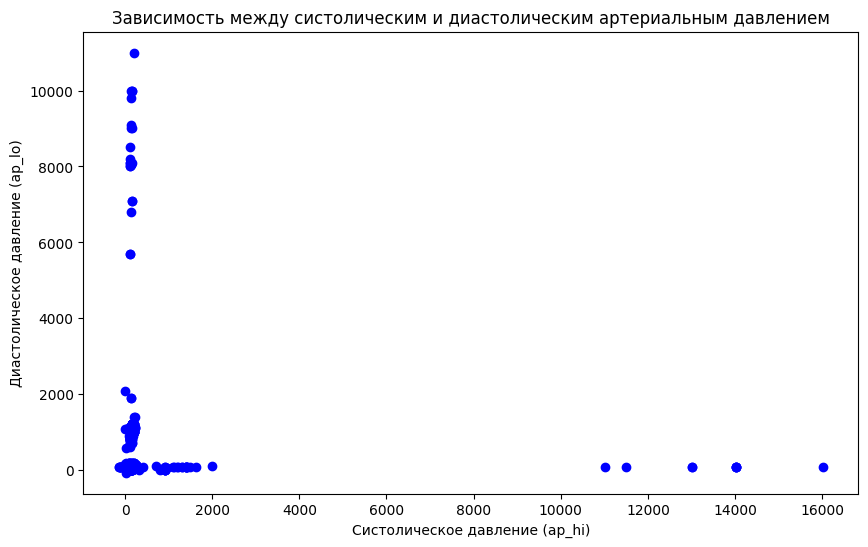

In [66]:
plt.figure(figsize=(10, 6))  # Опционально: Устанавливаем размер графика

# Создаем диаграмму рассеяния
plt.scatter(df['ap_hi'], df['ap_lo'], color='blue')

# Устанавливаем заголовок и метки осей
plt.title('Зависимость между систолическим и диастолическим артериальным давлением')
plt.xlabel('Систолическое давление (ap_hi)')
plt.ylabel('Диастолическое давление (ap_lo)')

# Показываем график
plt.show()

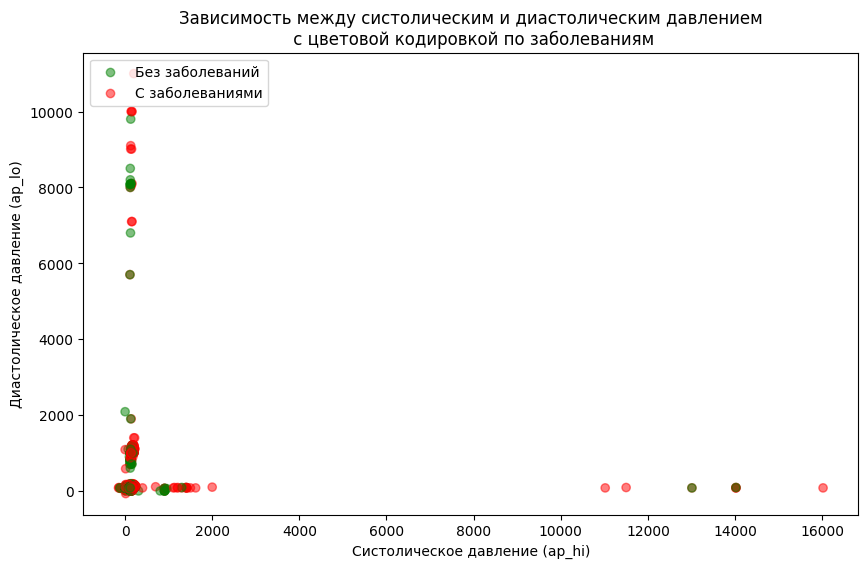

In [67]:
plt.figure(figsize=(10, 6))  # Опционально: Устанавливаем размер графика

# Цветовая кодировка: зелёный для пациентов без заболеваний (cardio=0), красный для пациентов с заболеваниями (cardio=1)
colors = df['cardio'].map({0: 'green', 1: 'red'})

# Создаем диаграмму рассеяния
plt.scatter(df['ap_hi'], df['ap_lo'], c=colors, alpha=0.5)

# Устанавливаем заголовок и метки осей
plt.title('Зависимость между систолическим и диастолическим давлением\n с цветовой кодировкой по заболеваниям')
plt.xlabel('Систолическое давление (ap_hi)')
plt.ylabel('Диастолическое давление (ap_lo)')

# Создание легенды
plt.scatter([], [], c='green', alpha=0.5, label='Без заболеваний')
plt.scatter([], [], c='red', alpha=0.5, label='С заболеваниями')
plt.legend(loc='upper left')

# Показываем график
plt.show()

# Задание 15

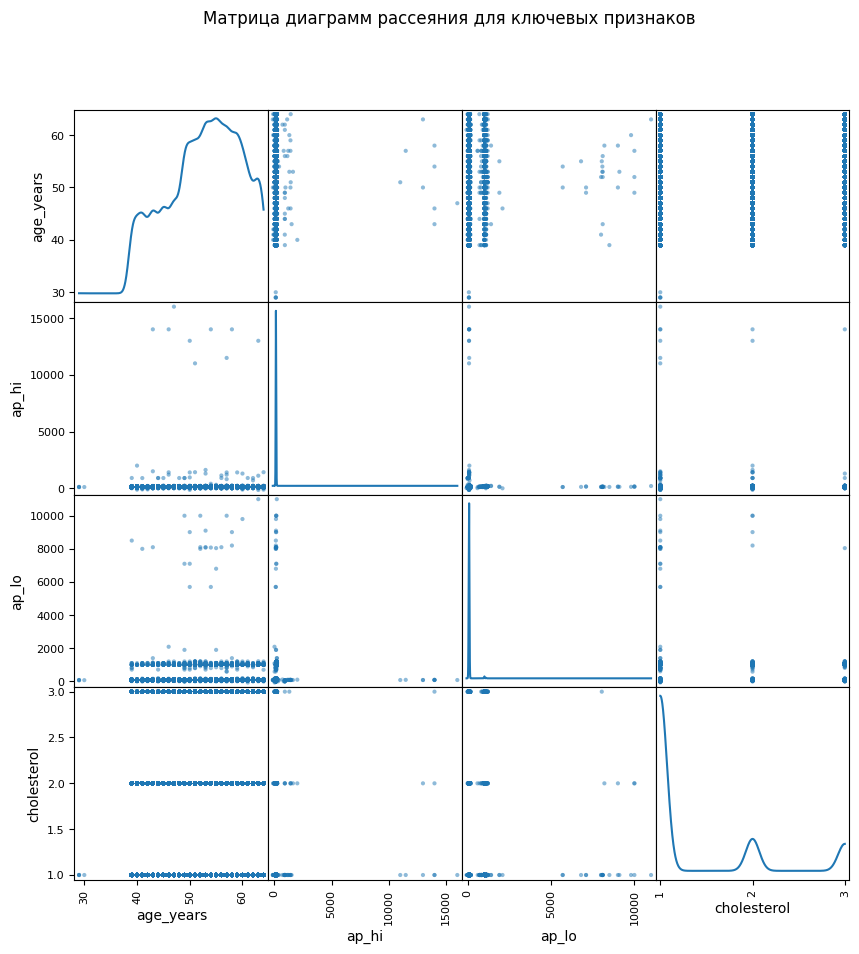

In [68]:
from pandas.plotting import scatter_matrix
# Создание матрицы диаграмм рассеяния
scatter_matrix(df[['age_years', 'ap_hi', 'ap_lo', 'cholesterol']], figsize=(10, 10), diagonal='kde', alpha=0.5)

# Показать график
plt.suptitle('Матрица диаграмм рассеяния для ключевых признаков')
plt.show()


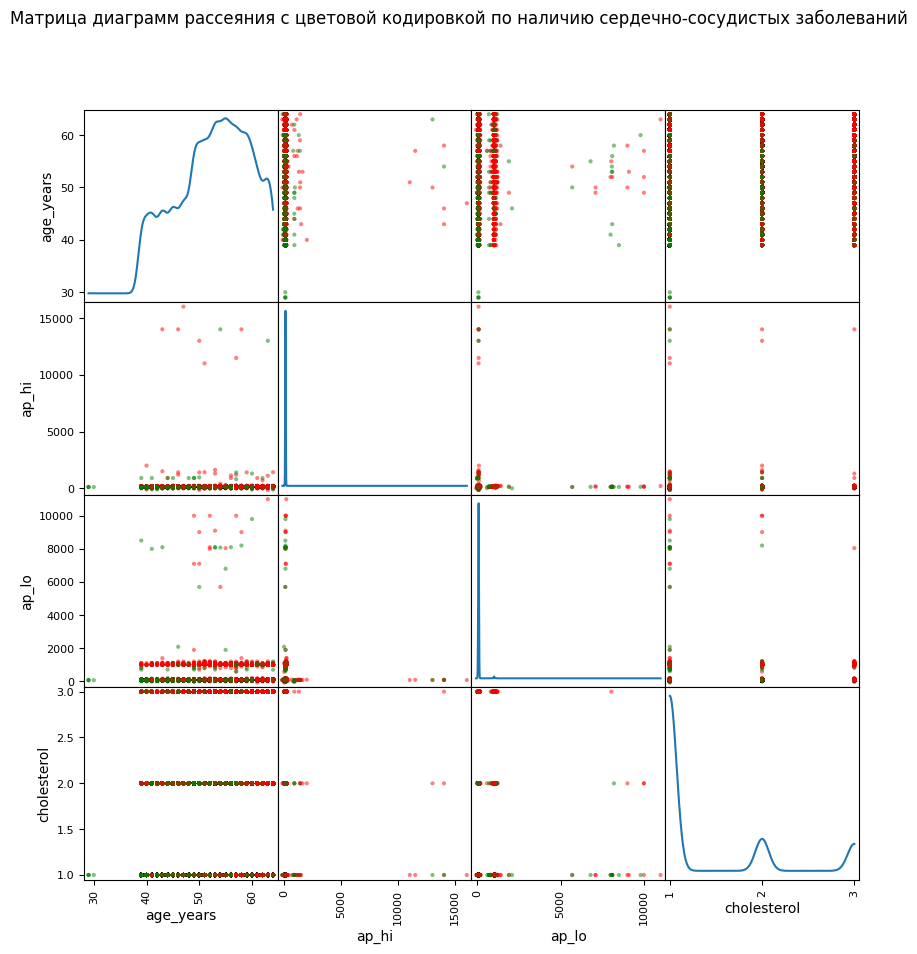

In [69]:
# Определяем цветовую палитру: зеленый для cardio=0 и красный для cardio=1
colors = df['cardio'].map({0: 'green', 1: 'red'})

# Создаем матрицу диаграмм рассеяния
scatter_matrix(df[['age_years', 'ap_hi', 'ap_lo', 'cholesterol']],
               figsize=(10, 10),
               diagonal='kde',
               alpha=0.5,
               color=colors)

# Добавляем заголовок
plt.suptitle('Матрица диаграмм рассеяния с цветовой кодировкой по наличию сердечно-сосудистых заболеваний')

# Отображаем график
plt.show()

# Задание 16

In [70]:
import seaborn as sns

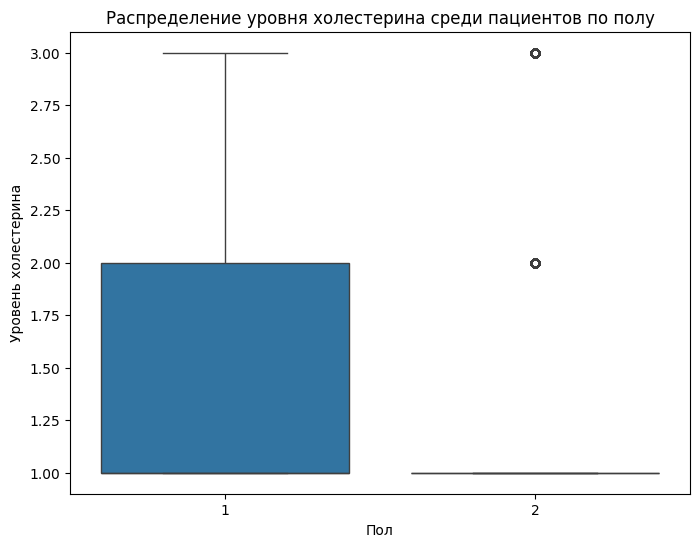

In [71]:
# Настраиваем размер графика
plt.figure(figsize=(8, 6))

# Создаем коробчатую диаграмму
sns.boxplot(x='gender', y='cholesterol', data=df)

# Устанавливаем заголовок и метки осей
plt.title('Распределение уровня холестерина среди пациентов по полу')
plt.xlabel('Пол')
plt.ylabel('Уровень холестерина')

# Отображаем график
plt.show()

# Задание 17

/tmp/ipython-input-72-1887535424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender_m', y='cholesterol', data=df, palette={"Male": "lightblue", "Female": "lightpink"})


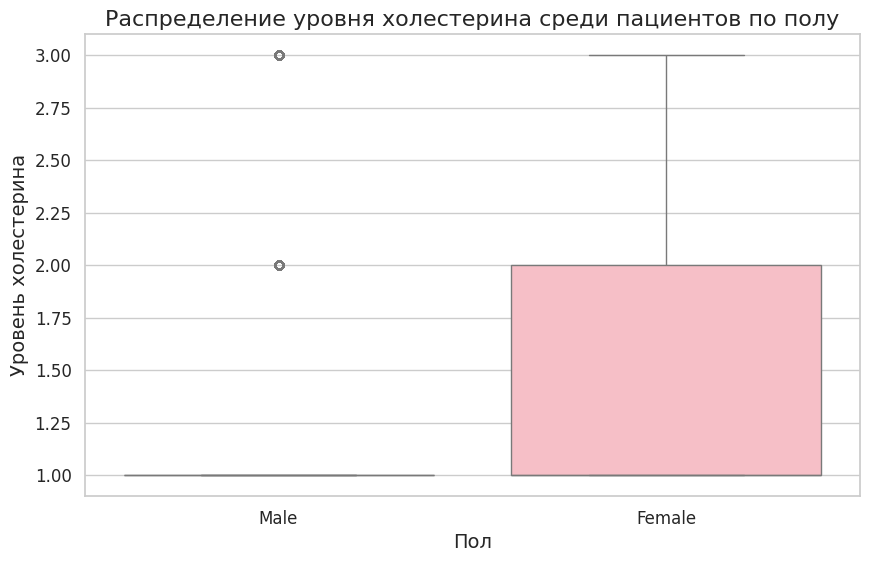

In [72]:
# Устанавливаем стиль и размер графика
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Создаем коробчатую диаграмму с измененными цветами
sns.boxplot(x='gender_m', y='cholesterol', data=df, palette={"Male": "lightblue", "Female": "lightpink"})

# Добавляем заголовок и подписи к осям
plt.title('Распределение уровня холестерина среди пациентов по полу', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Уровень холестерина', fontsize=14)

# Увеличиваем размер меток на осях
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Показываем график
plt.show()


# Задание 18

In [73]:
grouped_df = df.groupby('age_group')['ap_hi'].mean().reset_index()
grouped_df

/tmp/ipython-input-73-4132186600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('age_group')['ap_hi'].mean().reset_index()


,age_group,ap_hi
0,<30,113.333333
1,30-40,119.692135
2,40-50,125.547762
3,>50,130.477653


In [74]:
grouped_df1 = df.groupby('age_group')['ap_lo'].mean().reset_index()
grouped_df2 = df.groupby('age_group')['cholesterol'].mean().reset_index()


/tmp/ipython-input-74-1778643908.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df1 = df.groupby('age_group')['ap_lo'].mean().reset_index()
/tmp/ipython-input-74-1778643908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df2 = df.groupby('age_group')['cholesterol'].mean().reset_index()


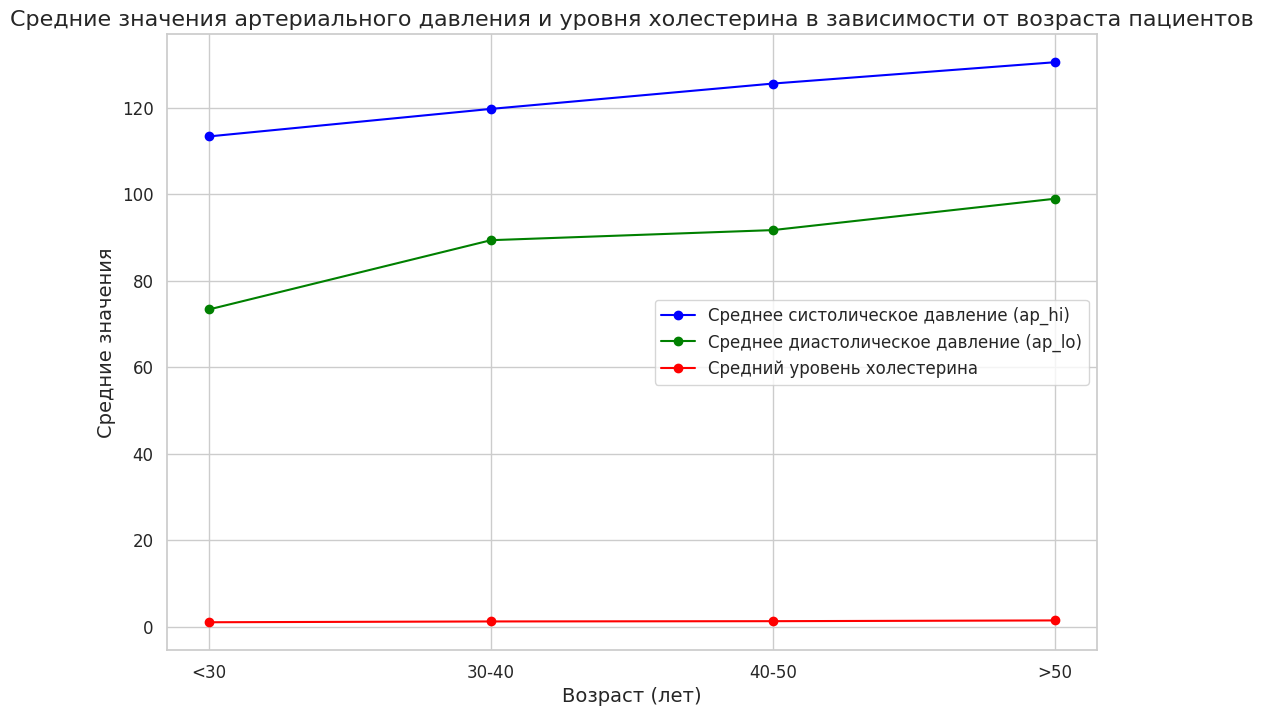

In [75]:
plt.figure(figsize=(12, 8))
# График для систолического давления
plt.plot(grouped_df['age_group'], grouped_df['ap_hi'], marker='o', label='Среднее систолическое давление (ap_hi)', color='blue')

# График для диастолического давления
plt.plot(grouped_df1['age_group'], grouped_df1['ap_lo'], marker='o', label='Среднее диастолическое давление (ap_lo)', color='green')

# График для уровня холестерина
plt.plot(grouped_df2['age_group'], grouped_df2['cholesterol'], marker='o', label='Средний уровень холестерина', color='red')

# Добавляем заголовок и подписи к осям
plt.title('Средние значения артериального давления и уровня холестерина в зависимости от возраста пациентов', fontsize=16)
plt.xlabel('Возраст (лет)', fontsize=14)
plt.ylabel('Средние значения', fontsize=14)

# Добавляем легенду
plt.legend(fontsize=12)

# Увеличиваем размер меток на осях
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Показываем график
plt.grid(True)
plt.show()
